## Homework 4

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_Linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [9]:
import pandas as pd

df = pd.read_csv('hw04_data.csv')

X = df.iloc[:, :2]
y = df.iloc[:, -1]

   34.62365962451697  78.0246928153624  0
0          30.286711         43.894998  0
1          35.847409         72.902198  0
2          60.182599         86.308552  1
3          79.032736         75.344376  1
4          45.083277         56.316372  0


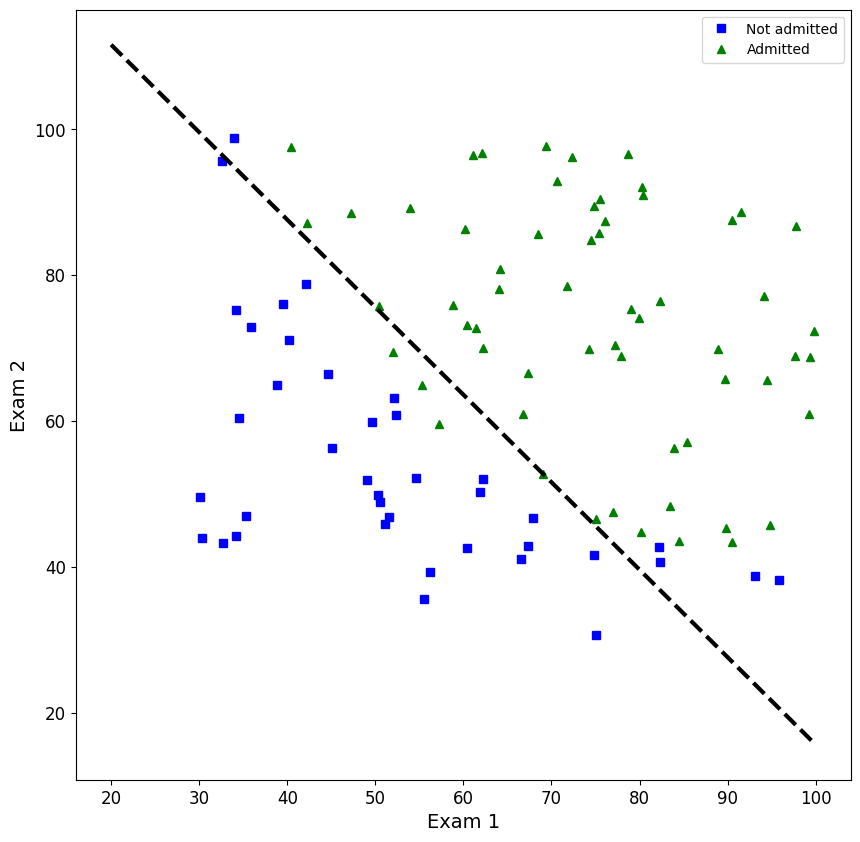

In [26]:
plt.figure(figsize=(10, 10))

# Plot the data for the “Not admitted” entries
plt.plot(X[y==0].iloc[:, 0], X[y==0].iloc[:, 1], "bs", label="Not admitted")

# Plot the data for the “Admitted” entries with the style of green triangles
plt.plot(X[y==1].iloc[:, 0], X[y==1].iloc[:, 1], "g^", label="Admitted")

plt.legend(loc="best")
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')

plt.show()

In [18]:
from pydataset import data
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

,34.62365962451697,78.0246928153624
62,30.058822,49.592974
40,51.547720,46.856290
95,42.261701,87.103851
18,76.978784,47.575964
97,55.340018,64.931938


In [23]:
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression()

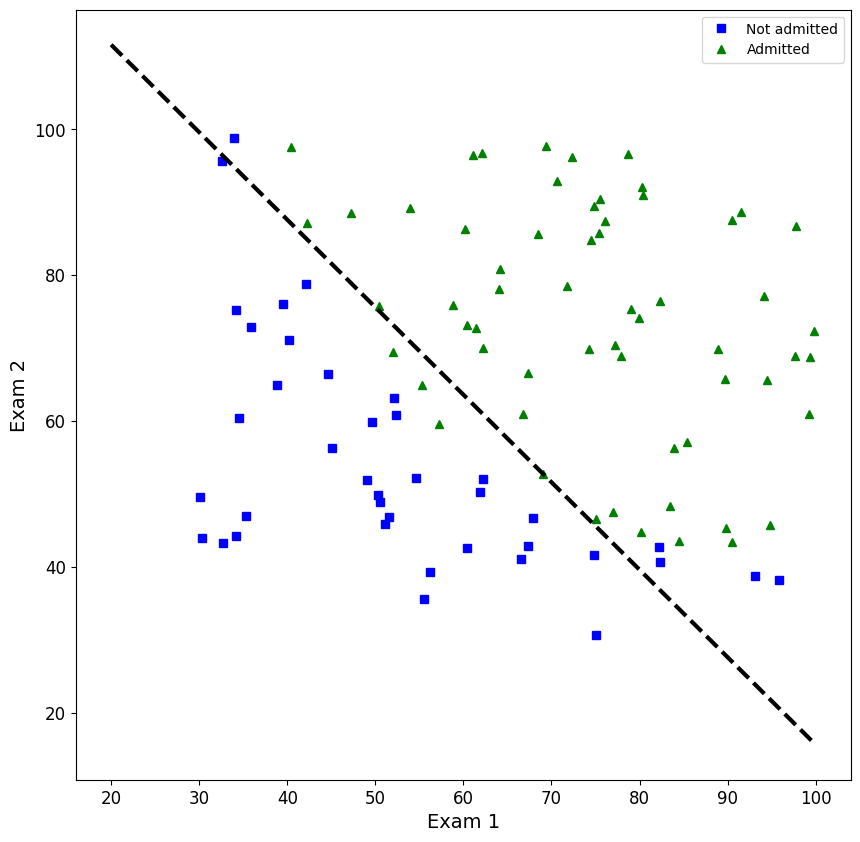

In [28]:

plt.figure(figsize=(10, 10))

# Plot the data for the “Not admitted” entries
plt.plot(X[y==0].iloc[:, 0], X[y==0].iloc[:, 1], "bs", label="Not admitted")

# Plot the data for the “Admitted” entries with the style of green triangles
plt.plot(X[y==1].iloc[:, 0], X[y==1].iloc[:, 1], "g^", label="Admitted")

plt.legend(loc="best")
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')

left_right = np.array([20, 100])
# If you save your model to a variable other than “log_reg”, you need to update the following command accordingly.
boundary = -(log_reg.coef_[0][0] * left_right +
log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)

plt.show()

# 5b. No, it did not perfectly separate it.It does a decent job however even from looking at the chart you can see some entries were on the wrong side of the regression.

In [34]:
# 6a.
student = [[45, 85]]
pred = log_reg.predict(student)
prob = log_reg.predict_proba(student)[0][1]
print(f"admitted: {pred}")
print(f"confidence: {prob}")

admitted: [1]
confidence: 0.6534451873162838


In [36]:
# 6b.
pred_test = log_reg.predict(X_test)
prob_test = log_reg.predict_proba(X_test)[:, 1]
print(f"test data: {pred_test}")

test data: [0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1]


In [38]:
# 6c.
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred_test)
print(f"accuracy: {acc}")

accuracy: 0.85


In [39]:
from sklearn.metrics import confusion_matrix
# 6d.
conf_matrix = confusion_matrix(y_test, pred_test)
print(conf_matrix)

[[10  2]
 [ 1  7]]


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)

print(precision)    # .78
print(recall)       # .88
print(f1)           # .82

0.7777777777777778
0.875
0.823529411764706


#### 7
a. I think the performance of this model is decent. there are a few slip ups but for the most part it gets a good guess at who will be accepted.\
b. I think the linear boundry fits the model fine. Thre is a pretty obvious split between accepted and not accepted.\
c. I think improving the model performance would be hard with the current setup. Honestly the model does a decent job and might even be overkill for something which has such an obvious split.
